# SUPPORT VECTOR MACHINE

## Task 1: Exploratory Data Analysis (EDA)

### 1.	Load the Mushroom dataset and perform fundamental data exploration.

In [1]:
#import pandas,numpy and warnings library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the csv file
df = pd.read_csv("mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
#Find the shape of the dataset
df.shape

(2000, 26)

In [4]:
#Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
#check for duplicate rows
df.duplicated().sum()

np.int64(1024)

In [6]:
#Drop duplicated rows
df = df.drop_duplicates()
#Recheck for duplicate rows
df.duplicated().sum()

np.int64(0)

In [7]:
#Get the dataset summary
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,976.000000,976.000000,976.000000
mean,633.275615,8.524684,12.598566
std,372.262936,3.703043,6.987077
min,0.000000,2.000000,1.000000
25%,306.750000,5.326820,6.141161
50%,622.500000,8.367245,12.626094
75%,959.250000,11.758624,18.559780
max,1279.000000,15.095066,25.000054


In [8]:
#Drop unnamed column 
df = df.drop('Unnamed: 0', axis=1)

In [9]:
#Check for null values
df.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [10]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

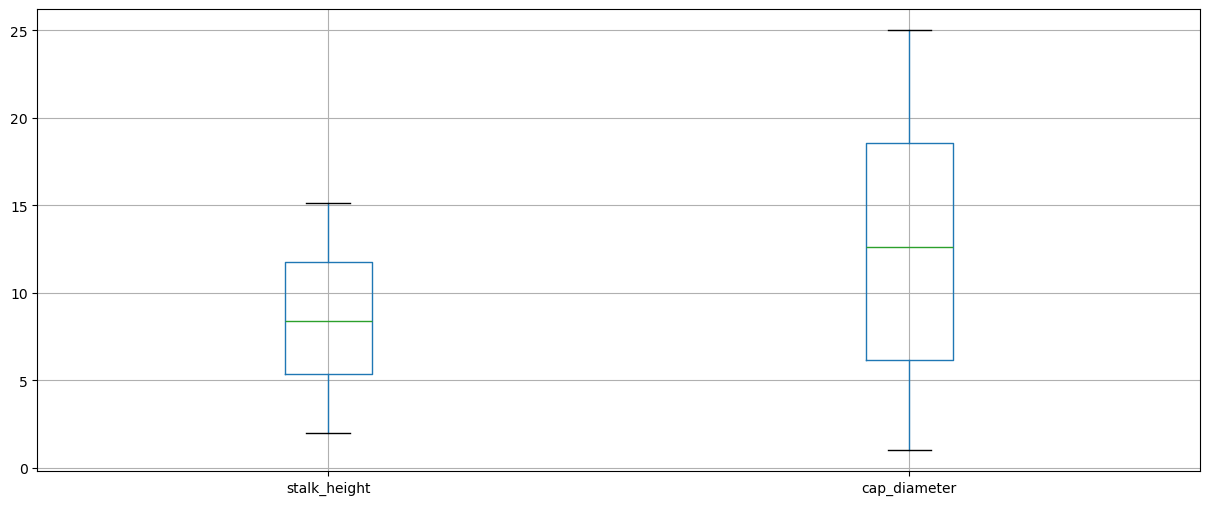

In [11]:
#Check for outliers
plt.figure(figsize=(15, 6))
df.boxplot()

### 2.	Utilize histograms, box plots, or density plots to understand feature distributions.

##### **Histogram**

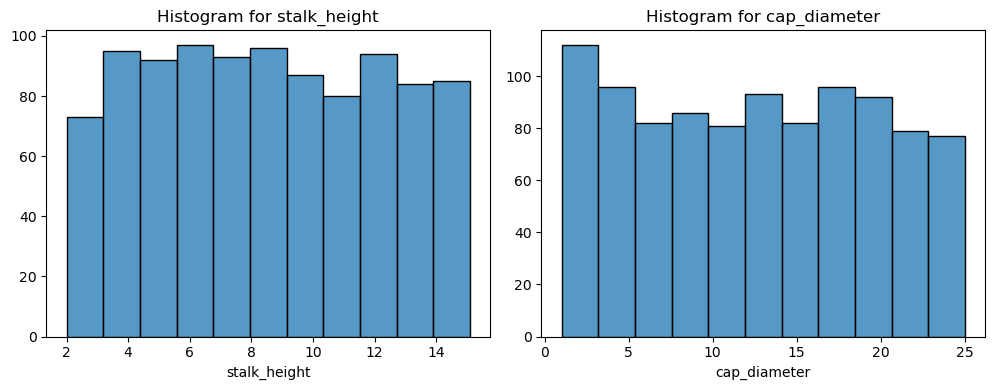

In [12]:
#Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 4))
num_plots = len(numeric_columns)
num_rows = (num_plots + 2) // 3 # Adjust rows based on number of plots

#Create histogram for all numerical columns
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(data=df, x=col)
    plt.title(f'Histogram for {col}')
    plt.ylabel('') 

plt.tight_layout()
plt.show()

##### **Box plot**

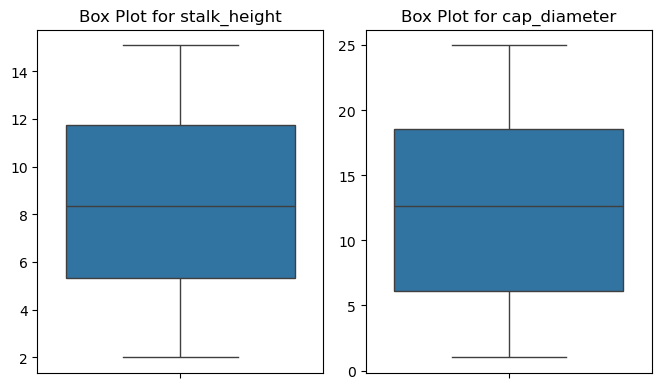

In [13]:
##Get the number of numeric columns 
plt.figure(figsize=(10, 4))
num_plots = len(numeric_columns)
num_rows = (num_plots + 2) // 3 # Adjust rows based on number of plots

#Create boxplot for all numerical columns
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel('') 
plt.tight_layout()
plt.show()

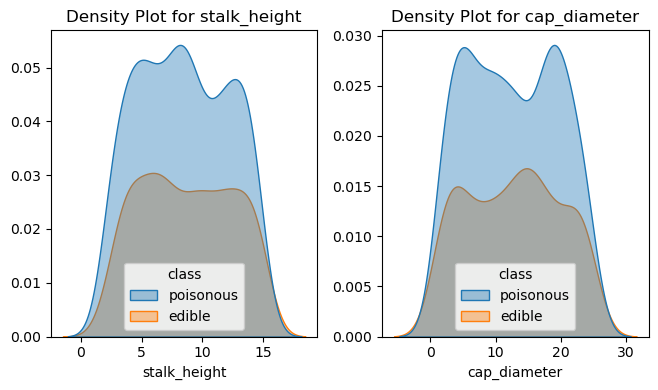

In [14]:
##Get the number of numeric columns 
plt.figure(figsize=(10, 4))
num_plots = len(numeric_columns)
num_rows = (num_plots + 2) // 3 # Adjust rows based on number of plots

#Create density for all numerical columns
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.kdeplot(data=df, x=col, fill=True, color='purple',hue='class', alpha=0.4)
    plt.title(f'Density Plot for {col}')
    plt.ylabel('') 
plt.tight_layout()
plt.show()

### 3.	Investigate feature correlations to discern relationships within the data.

In [15]:
# split numerical and categorical data
#Select numeric columns
num_cols = df.select_dtypes(include=['number']).columns
#Select categorical columns
cat_cols = df.select_dtypes(include=['object','bool']).columns

In [16]:
corr = df[num_cols].corr()
corr

,stalk_height,cap_diameter
stalk_height,1.000000,-0.034891
cap_diameter,-0.034891,1.000000


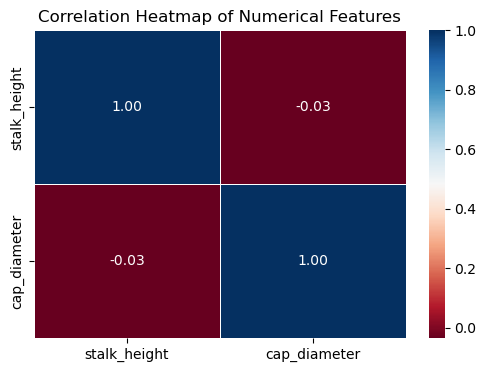

In [17]:
# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Task 2: Data Preprocessing

### 1.	Encode categorical variables if necessary.

In [18]:
#split target and features
target=df['class']
features=df.drop(columns='class')

In [19]:
#Aplly On-Hot encoding
fcat=features.select_dtypes(include=['object','bool']).columns
df = pd.get_dummies(df, columns=fcat, drop_first=True)
df.head()

,class,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,poisonous,14.276173,5.054983,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,edible,3.952715,19.068319,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,poisonous,9.054265,7.205884,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,poisonous,5.226499,20.932692,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,poisonous,14.037532,12.545245,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


### 2.	Split the dataset into training and testing sets.

In [20]:
# Import the train_test_split function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split,GridSearchCV

In [21]:
#Split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2, random_state=42,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(780, 24)
(196, 24)
(780,)
(196,)


## Task 3: Data Visualization

### 1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

<Figure size 1000x800 with 0 Axes>

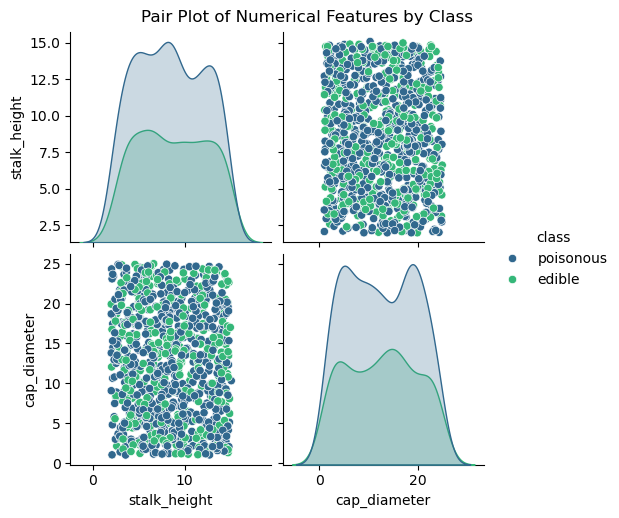

In [22]:
# Select numerical features and the target variable
features_for_pairplot = ['stalk_height', 'cap_diameter', 'class']
df_pairplot = df[features_for_pairplot]

# Create a pair plot
plt.figure(figsize=(10, 8))
sns.pairplot(df_pairplot, hue='class', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features by Class', y=1.02) # Adjust suptitle position
plt.show()

### 2.	Visualize class distributions to gauge dataset balance or imbalance.

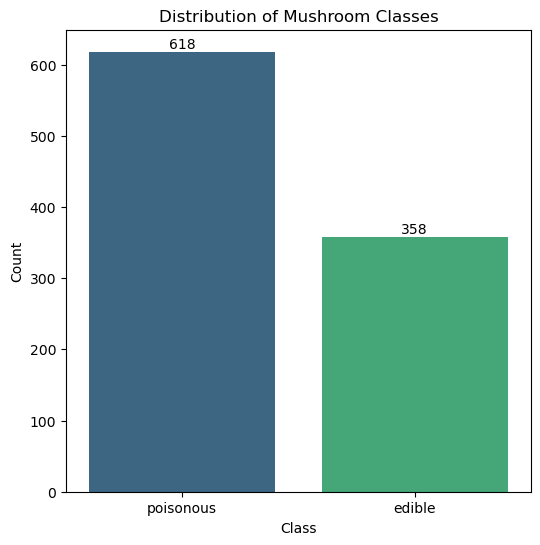

In [23]:
#Class distributions
plt.figure(figsize=(6, 6))
cnt=sns.countplot(data=df, x='class', palette='viridis')
# Add counts above bars
for container in cnt.containers:
    cnt.bar_label(container)
plt.title('Distribution of Mushroom Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Task 4: SVM Implementation

### 1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

In [24]:
#import SVC library
from sklearn.svm import SVC

In [25]:
#Build SVC classifier
svc_classifier = SVC(kernel='linear', random_state=42)
svc_classifier

SVC(kernel='linear', random_state=42)

#### 2.	Train the SVM model on the training data.

In [26]:
#Split target and features columns
target = df['class']
features = df.drop(columns='class')

#Split x_train, y_train,x_test and y_test
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Train the SVC model
svc_classifier.fit(x_train, y_train)
# Predict
y_pred = svc_classifier.predict(x_test)

(780, 104)
(196, 104)
(780,)
(196,)


#### 3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [27]:
#import accuracy, precision, recall, F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
#Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Performance Metrics:
Accuracy: 0.6020
Precision: 0.5543
Recall: 0.6020
F1-Score: 0.5531


## Task 5: Visualization of SVM Results

#### 1.	Visualize classification results on the testing data.

In [29]:
#import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report

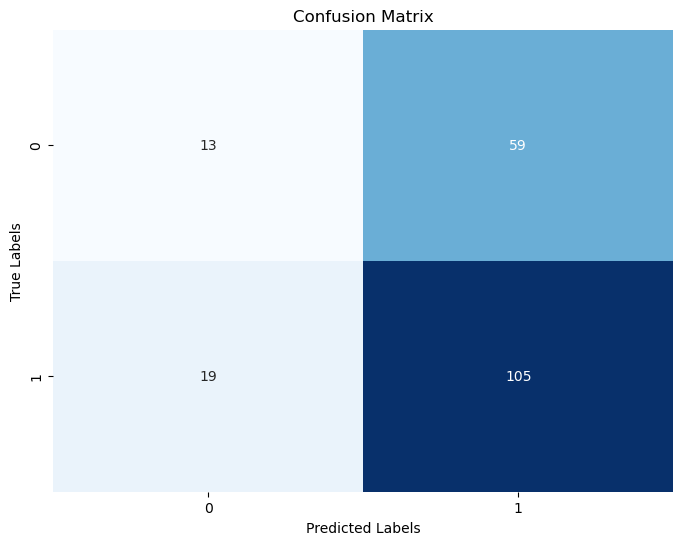

-------------------- Classification Report: ---------------------
-----------------------------------------------------------------
              precision    recall  f1-score   support

      edible       0.41      0.18      0.25        72
   poisonous       0.64      0.85      0.73       124

    accuracy                           0.60       196
   macro avg       0.52      0.51      0.49       196
weighted avg       0.55      0.60      0.55       196



In [30]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("-------------------- Classification Report: ---------------------")
print("-----------------------------------------------------------------")
print(classification_report(y_test, y_pred))

## Task 6: Parameter Tuning and Optimization

#### 1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [31]:
#import GridSearchCV and SVC libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [32]:
# Define parameter grid
param_grid_data = {
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'C': [0.1, 1, 10, 100]
}

# Base SVM model
svm = SVC(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid_data,scoring='accuracy', cv=5, n_jobs=-1,verbose=3)

# Train with grid search
grid_search.fit(x_train, y_train)

# Best model
best_svm = grid_search.best_estimator_

# Predict
y_pred = best_svm.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\nBest Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 0.6326530612244898
Precision: 0.4002498958767181
Recall: 0.6326530612244898
F1-score: 0.49030612244897964


## Task 7: Comparison and Analysis

#### 1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

In [34]:
# Initialize SVM classifiers with different kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_poly = SVC(kernel='poly', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the SVM models on the entire training dataset
svm_linear.fit(x_train, y_train)
svm_poly.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)

# Predict the labels for the testing dataset
y_pred_linear = svm_linear.predict(x_test)
y_pred_poly = svm_poly.predict(x_test)
y_pred_rbf = svm_rbf.predict(x_test)

# Evaluate the performance of each model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear,average='weighted', zero_division=0)
recall_linear = recall_score(y_test, y_pred_linear,average='weighted', zero_division=0)
f1_linear = f1_score(y_test, y_pred_linear,average='weighted', zero_division=0)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly,average='weighted', zero_division=0)
recall_poly = recall_score(y_test, y_pred_poly,average='weighted', zero_division=0)
f1_poly = f1_score(y_test, y_pred_poly,average='weighted', zero_division=0)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf,average='weighted', zero_division=0)
recall_rbf = recall_score(y_test, y_pred_rbf,average='weighted', zero_division=0)
f1_rbf = f1_score(y_test, y_pred_rbf,average='weighted', zero_division=0)

#create dictionary
Kernels_comp = {
            'Kernels': ["Linear", "Polynomial", "RBF"],
            'Accuracy': [f"{accuracy_linear:.4f}",f"{accuracy_poly:.4f}",f"{accuracy_rbf:.4f}"],
            'Precision': [f"{precision_linear:.4f}",f"{precision_linear:.4f}",f"{precision_rbf:.4f}"],
            'Recall': [f"{recall_linear:.4f}",f"{recall_poly:.4f}",f"{recall_rbf:.4f}"],
            'F1': [f"{f1_linear:.4f}",f"{f1_poly:.4f}",f"{f1_rbf:.4f}"]
}
#Create DataFrame
SVM_perf_comp=pd.DataFrame(Kernels_comp)
print("SVM performance with various Kernels:")
SVM_perf_comp

SVM performance with various Kernels:


,Kernels,Accuracy,Precision,Recall,F1
0,Linear,0.6020,0.5543,0.6020,0.5531
1,Polynomial,0.6327,0.5543,0.6327,0.4903
2,RBF,0.6327,0.4002,0.6327,0.4903


#### 2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

#### **Data Analysis Key Findings:**
**SVM Strengths:**
- The SVM models effectively handled the high-dimensional feature space of 104 features resulting from one-hot encoding.
- Polynomial and RBF kernels achieved slightly higher accuracy (0.6327) compared to the Linear kernel (0.6020), demonstrating SVMs ability to    capture non-linear relationships in the data.
- SVMs maximum margin classification provides potential for good generalization.


**SVM Weaknesses:**
- Class Imbalance: A significant class imbalance was observed, with 124 poisonous mushrooms versus 72 edible mushrooms in the test set, likely biasing model performance.
- Inconsistent Performance Metrics: While accuracy improved with non-linear kernels, precision (e.g., RBF kernel: 0.4002) and F1-score (e.g., Polynomial/RBF kernel: 0.4903) were often lower than the Linear kernel (precision: 0.5543, F1: 0.5531), indicating issues with false positives and a poor balance between precision and recall.
- Critical Misclassifications: The Linear SVM performed poorly on the 'edible' class . Crucially, 19 poisonous mushrooms were misclassified as edible, posing a severe safety risk.
- Sensitivity to Scaling: Numerical features (stalk_height, cap_diameter) were not explicitly scaled, a potential weakness as SVMs are sensitive to feature magnitudes.
- Low Interpretability: SVMs, particularly with non-linear kernels, are considered "black-box" models, making it difficult to understand the rationale behind classifications, which is critical for a high-stakes task like mushroom identification.


#### 3.	Discuss practical implications of SVM in real-world classification tasks.

#### **Practical Implications of SVM in Real-World Classification**
**1. Image and Object Recognition:**
- Face Detection: SVMs classify image regions as "face" or "non-face," enabling applications in security and social media.
- Handwriting Recognition: Used in digit classification (e.g., postal code recognition) where SVMs outperform simpler classifiers.
- Medical Imaging: Helps in tumor detection by distinguishing between healthy and abnormal tissue patterns.

**2. Text and Document Classification:**
- Spam Filtering: SVMs separate spam from legitimate emails by analyzing word frequencies and metadata.
- Sentiment Analysis: Applied in social media monitoring to classify text as positive, negative, or neutral.
- Hypertext Categorization: SVMs are effective in organizing large document repositories into meaningful categories.

**3. Bioinformatics and Healthcare:**
- Protein Classification: SVMs classify protein sequences and structures, aiding drug discovery.
- Disease Diagnosis: Used in cancer classification (e.g., distinguishing malignant vs. benign tumors) with high accuracy.
- Genomics: Helps in gene expression analysis, identifying disease markers.

**4. Finance and Business:**
- Credit Risk Analysis: SVMs classify loan applicants into "high risk" vs. "low risk" categories.
- Fraud Detection: Applied in transaction monitoring to flag suspicious activity.
- Stock Market Prediction: Though noisy, SVMs can classify trends (upward vs. downward) when combined with feature engineering.

**5. Industrial Applications:**
- Fault Detection: In manufacturing, SVMs classify sensor data to detect machine faults early.
- Quality Control: Used to classify products as defective or non-defective based on inspection data.

@**SVMs are a strong choice when:**
- The dataset has a clear margin of separation between classes.
- The data is high-dimensional with a relatively smaller number of samples.
- Non-linear relationships are present, requiring kernel tricks.
- Robustness against overfitting is critical, especially in cases where the number of features is greater than the number of samples.